# Perceptron

A perceptron is a basic learning algorithm/model that sits as a pillar of neural network programming. For this notebook when we refer to perceptron we're going to refer to a single-layer perceptron that will operate as follows:

- Multiple input nodes will be connected to a node (or multiple nodes) in the next layer. 
- We can also have a a bias node ${w_0}$
- The node(s) in the next layer take a weighted sum of all its inputs: $ \sum{w_i}{I_i} $
- Each of the node(s) in the next layer will have a "threshold" ${t}$. It can compare the weighted sum against that threshold and output in binary form: 
  - $ if \sum{w_i}{I_i} \geq {t} $ then $ y = 1 $
  - $ if \sum{w_i}{I_i} \lt {t} $ then $ y = 0 $

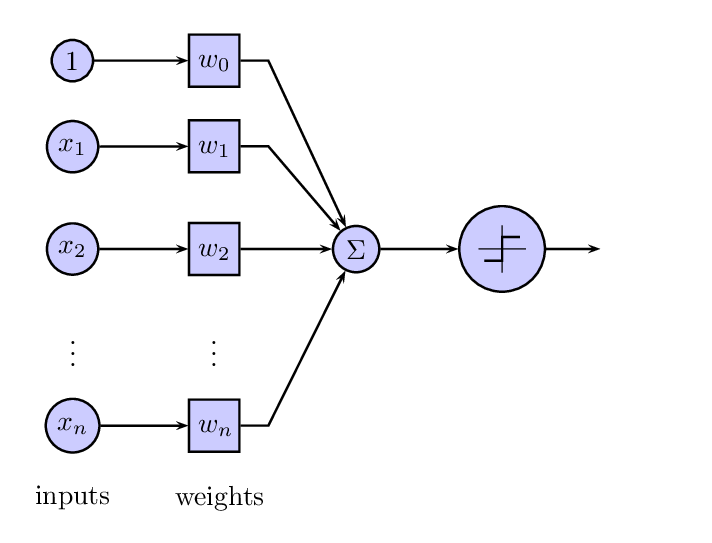

In [1]:
from IPython.display import Image
Image(filename='../images/perceptron.png')

We can use an easy example of a single-layer perceptron to train an AND gate. First let's look at an AND gate's behaviour.

### The Perceptron Algorithm

We're going to go through the algorithm for a single-layer perceptron. For a multi-layer perceptron, which has a hidden layer, we'll need to use a more complicated algorithm such as backpropogation. 

The algorith will require a training data set which will consist of an input ${x}$ with any number of features and  binary desired output for the input ${d}$. i.e. one line could be $x= [1, 0]$, $d = 0$. We will also require a function $ f $ which will produce the output. 

\begin{align}
f(x) = \{  \begin{array} 1 1 \space if \space w \cdot x + b > 0 \\ 0 \space otherwise\end{array}
\end{align}

$ w \cdot x $ is the dot product between the weights and the input. $ b $ is the bias, and allows us to shift the decision boundary away from the origin. Within the case of this single layer perceptron we use a step activation function. This is useful since we plan to operate on linearly seperable data. Later we're going to be working on multi-layer perceptrons and other variations that deal with data that's not necessarily linear. In that case we would not be able to use this activation function and instead using something such as the sigmoid function. 


The algorithm witself ill operate as follows:

1. Initialize all weights to begin with as really small random values. 
2. Create a train function which will train the perceptron with the data for each example ${j}$. For each example ${j}$, perform the following steps over the input ${i_j}$ and desired output ${d_j}$:
    1. Calculate the actual output using the following hypothesis function:
        \begin{align}
        y_j(t) & = f|w(t) \cdot x_j| \\
               & = f|{w_0(t)}x_{j,0} + {w_1(t)}x_{j,1} .. + {w_n(t)}x_{j,n}| 
        \end{align}
    2. Update the weights:
        \begin{align}
        w_i(t + 1) & = w_i(t) + (d_j - y_j(t))x_{j,i}
        \end{align}

In [2]:
import numpy as np
import random 

class Perceptron:
    
    def __init__(self, input_size):
        """Initialize perceptron with random, preferably small, weights."""
        self.w = [random.random() for i in range(input_size)]
    
    def output(self, x):
        """Obtain output from perceptron based on input vector """
        return self.activation(self.w, x)
          
    def train(self, data):
        """Train perceptron based on provided data"""
        for j in data:
            x = j[:len(j)-1]
            d = j[len(j)-1]
            
            y = self.activation(self.w, x)
            self.update_weights(self.w, d, x, y)

    def activation(self, w, x):
        """Activation function for perceptron using step function outlined above"""
        if np.dot(self.w, x) < 0:
            return 1
        else:
            return 0
    
    def update_weights(self, w, d, x, y):
        """Updates weights using function outlined above"""
        for i in range(len(self.w)):
            self.w[i] = w[i] + (y - d)*x[i]

In [3]:
from pylab import rand, plot, norm, show

def generate_data(size):
    """Generate test data which will essentially just add blue (xb, yb) and red (xr, yr) points to a 2D graph"""
    xb = rand(size)*0.5       # between 0 and 0.5
    yb = rand(size)*0.5 + 0.5 # between 0.5 and 1
    xr = rand(size)*0.5 + 0.5 # between 0.5 and 1
    yr = rand(size)*0.5       # between 0 and 0.5
    
    data = []
    for i in range(size):
        data.append([xb[i], yb[i], 1])
        data.append([xr[i], yr[i], 0])
    
    return data

perceptron = Perceptron(2) # Perceptron with input vector of size 2: (x, y) coords
training_data = generate_data(100)
perceptron.train(training_data)

test_data = generate_data(20)
for j in test_data:
    input_vector = j[:len(j)-1]
    desired_output = j[len(j)-1]
    classification = perceptron.output(input_vector)
    
    if classification == 1:
        plot(j[0], j[1], 'ob')
    else:
        plot(j[0], j[1], 'or')

# plot of the separation line.
# The separation line is orthogonal to w
n = norm(perceptron.w)
ww = perceptron.w/n
ww1 = [ww[1],-ww[0]]
ww2 = [-ww[1],ww[0]]
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
show()

The perceptron is a linear classifier. A linear classifier, as can be seen from its name, makes a decision on its classification based on a linear combination of its feature values. Thus it will never be able to correctly classify unless the training data set is linearly seperable. In order to get a working perceptron algorithm it's important to ensure that the data is linearly seperable to guarantee convergence. Graphically this would mean ensuring that a straight line could seperate our data into its two classes.

One method of testing for linear seperability discussed in later notebooks is constructing a linear SVM and checking if it has 0% error.  